In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
endmember_data_dir = '../../secondary_data/main_mosaic_nnls.npz'
xray_energies_dir = '../../secondary_data/xray_energies.npz'

In [3]:
# load xray energies, spectra and normalize the spectra
endmember_spectra = np.load(endmember_data_dir)['endmembers']
endmember_spectra = (endmember_spectra - np.min(endmember_spectra))/(np.max(endmember_spectra) - np.min(endmember_spectra))

xray_energies = np.load(xray_energies_dir)['xray_energies']
print(endmember_spectra.shape) 
print(xray_energies.shape)

(250, 12)
(250,)


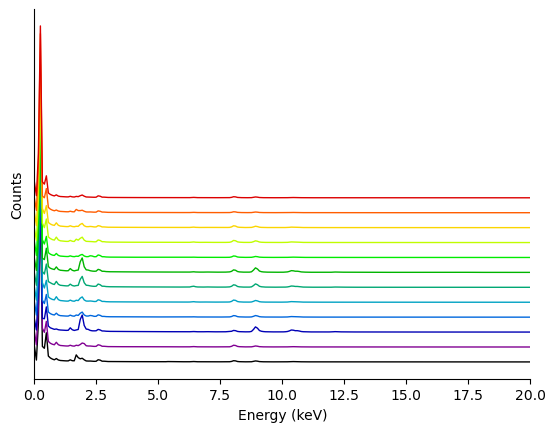

In [4]:
# offset, plot and save all endmember spectra
endmember_spectra_offset = np.copy(endmember_spectra)
seperation_interval = 1/endmember_spectra_offset.shape[1]
for i in range(endmember_spectra_offset.shape[1]):
    endmember_spectra_offset[:,i] += (i*seperation_interval)

cmap = plt.get_cmap('nipy_spectral')
cmap_idx = np.linspace(0, 0.9, endmember_spectra_offset.shape[1])

f, ax = plt.subplots()

for i in range(endmember_spectra_offset.shape[1]):
    ax.plot(xray_energies, 
            endmember_spectra_offset[:,i], 
            color = list(cmap(cmap_idx[i])), 
            linewidth = 1)

ax.set_yticks([])
ax.set_ylabel('Counts')
ax.set_xlabel('Energy (keV)')
ax.spines[['top', 'right']].set_visible(False)
ax.set_xlim(0,20)
plt.savefig('../svg/figure_2B_all.svg')

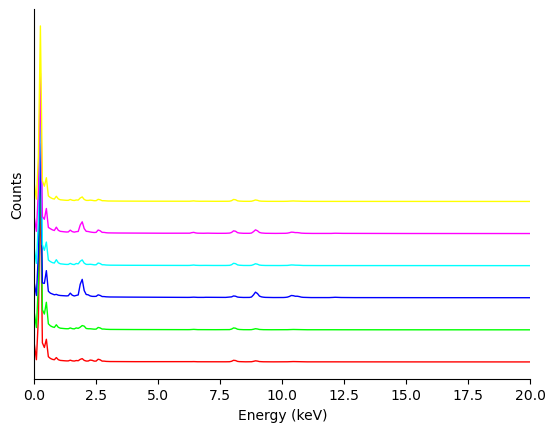

In [5]:
# offset, plot and save a selection of endmember spectra
indices = [7,1,2,4,5,9]
colors = [[1,0,0], [0,1,0], [0,0,1], [0,1,1], [1,0,1], [1,1,0]]

endmember_spectra_offset = np.copy(endmember_spectra[:,indices])
seperation_interval = 1/endmember_spectra_offset.shape[1]
for i in range(endmember_spectra_offset.shape[1]):
    endmember_spectra_offset[:,i] += (i*seperation_interval)

f, ax = plt.subplots()

for i in range(endmember_spectra_offset.shape[1]):
    ax.plot(xray_energies, 
            endmember_spectra_offset[:,i], 
            color = colors[i], 
            linewidth = 1)

ax.set_yticks([])
ax.set_ylabel('Counts')
ax.set_xlabel('Energy (keV)')
ax.spines[['top', 'right']].set_visible(False)
ax.set_xlim(0,20)
#plt.savefig('../svg/figure_2B_selected.svg')